# Online Retail

In [1]:
#Importing Libraries

import numpy as np
import os
import pandas as pd
import scipy as sp

#visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Predictive model
from sklearn.cluster import KMeans

# Data Cleaning

In [2]:
#Importing Dataset

data_cols=['Invoice','StockCode','Description','Quantity','InvoiceDate','Price','CustomerID','Country']
data=pd.read_excel(r"C:\Users\Hp\Desktop\online_retail_II.xlsx", names=data_cols)

data.shape

(525461, 8)

In [4]:
data.head() 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
data.columns.tolist()

['Invoice',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'Price',
 'CustomerID',
 'Country']

In [6]:
data.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
CustomerID            float64
Country                object
dtype: object

# Data Understanding

In [7]:
#Listing Some Inactive StockCodes

inactive = data['StockCode'].unique()
inactive.sort
print('Irrelevant Transactions: \n',inactive[::-1][:4])

#Quantity and Price Summary
data.describe().iloc[:,:2]

Irrelevant Transactions: 
 [21120 22933 22935 22936]


,Quantity,Price
count,525461.000000,525461.000000
mean,10.337667,4.688834
std,107.424110,146.126914
min,-9600.000000,-53594.360000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.210000
max,19152.000000,25111.090000


In [8]:
print("Number of transactions: ", data['Invoice'].nunique())
print("Number of products bought: ", data['StockCode'].nunique())
print("Number of customers:", data['CustomerID'].nunique())
print('Number of countries: ', data['Country'].nunique())

Number of transactions:  28816
Number of products bought:  4632
Number of customers: 4383
Number of countries:  40


In [9]:
#ranking of the most ordered products

data.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending = False).head()

,Quantity
Description,
WHITE HANGING HEART T-LIGHT HOLDER,57733
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54698
BROCADE RING PURSE,47647
PACK OF 72 RETRO SPOT CAKE CASES,46106
ASSORTED COLOUR BIRD ORNAMENT,44925


In [10]:
#how many invoices are there?

data["Invoice"].nunique()

28816

In [11]:
#which are the most expensive products?

data.sort_values("Price", ascending = False).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
241824,C512770,M,Manual,-1,2010-06-17 16:52:00,25111.09,17399.0,United Kingdom
241827,512771,M,Manual,1,2010-06-17 16:53:00,25111.09,NaN,United Kingdom
320581,C520667,BANK CHARGES,Bank Charges,-1,2010-08-27 13:42:00,18910.69,NaN,United Kingdom
517953,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom
519294,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom


In [12]:
#top 5 countries with the highest number of orders

data["Country"].value_counts().head()

United Kingdom    485852
EIRE                9670
Germany             8129
France              5772
Netherlands         2769
Name: Country, dtype: int64

In [13]:
#total spending - a new column

data['TotalPrice'] = data['Price']*data['Quantity']

In [14]:
# From which countries we get the most income?

data.groupby("Country").agg({"TotalPrice":"sum"}).sort_values("TotalPrice", ascending = False).head()

,TotalPrice
Country,
United Kingdom,8.194778e+06
EIRE,3.522427e+05
Netherlands,2.638634e+05
Germany,1.962904e+05
France,1.307699e+05


# Exploratory Data Analysis

In [15]:
#old shopping date

data["InvoiceDate"].min() 

Timestamp('2009-12-01 07:45:00')

In [16]:
#new shopping date

data["InvoiceDate"].max() 

Timestamp('2010-12-09 20:01:00')

In [17]:
#to make the assessment easier, today's date is set as January 1, 2012.

today = pd.datetime(2012,1,1) 
today

C:\Users\Hp\Documents\New folder\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


datetime.datetime(2012, 1, 1, 0, 0)

In [18]:
#changing the data type of the order date

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [19]:
#taking values greater than 0

data = data[data['Quantity'] > 0]
data = data[data['TotalPrice'] > 0]

In [20]:
#removal of observation units with missing data from data

data.dropna(inplace = True) 

In [21]:
#checking for missing values in the dataset

data.isnull().sum(axis=0)

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

In [23]:
data.shape 

(407664, 9)

In [24]:
#explanatory statistics values of the observation units corresponding to the specified percentages

data.describe([0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Quantity,407664.0,13.585585,96.840747,1.000,1.00,1.00,1.00,2.00,5.00,12.00,24.00,36.0,144.00,19152.0
Price,407664.0,3.294438,34.757965,0.001,0.29,0.42,0.65,1.25,1.95,3.75,6.75,8.5,14.95,10953.5
CustomerID,407664.0,15368.592598,1679.762138,12346.000,12435.00,12731.00,13044.00,13997.00,15321.00,16812.00,17706.00,17913.0,18196.00,18287.0
TotalPrice,407664.0,21.664909,77.150058,0.001,0.65,1.25,2.10,4.95,11.90,19.50,35.70,67.5,201.60,15818.4


In [25]:
#customer distribution by country

country_cust_data=data[['Country','CustomerID']].drop_duplicates()
country_cust_data.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
34,United Kingdom,3969
12,Germany,67
11,France,47
28,Spain,25
21,Netherlands,22
25,Portugal,18
3,Belgium,17
29,Sweden,16
0,Australia,15
30,Switzerland,14


In [26]:
#keeping only United Kingdom data

df_uk = data.query("Country=='United Kingdom'").reset_index(drop=True)
df_uk.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


# Data Visualization

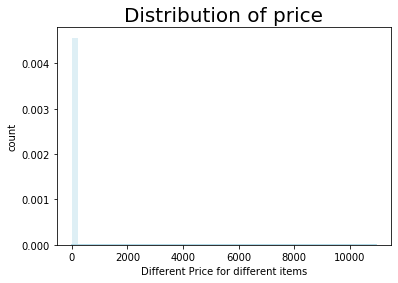

In [27]:
# visualizing the price

sns.distplot(data['Price'], color = 'lightblue')
plt.title('Distribution of price', fontsize = 20)
plt.xlabel('Different Price for different items')
plt.ylabel('count')
plt.show()

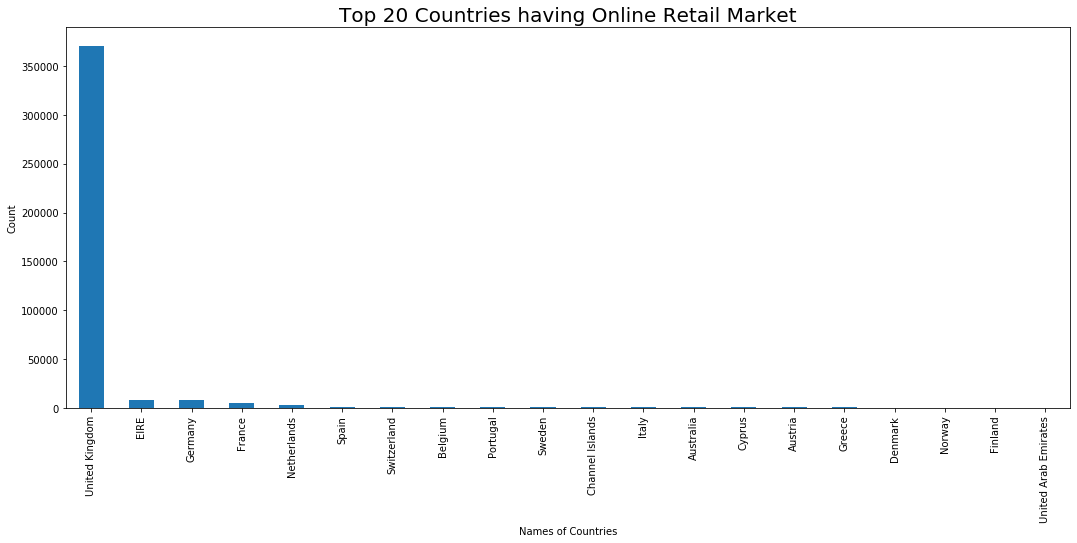

In [28]:
# checking the different values for country

data['Country'].value_counts().head(20).plot.bar(figsize = (18, 7))
plt.title('Top 20 Countries having Online Retail Market', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

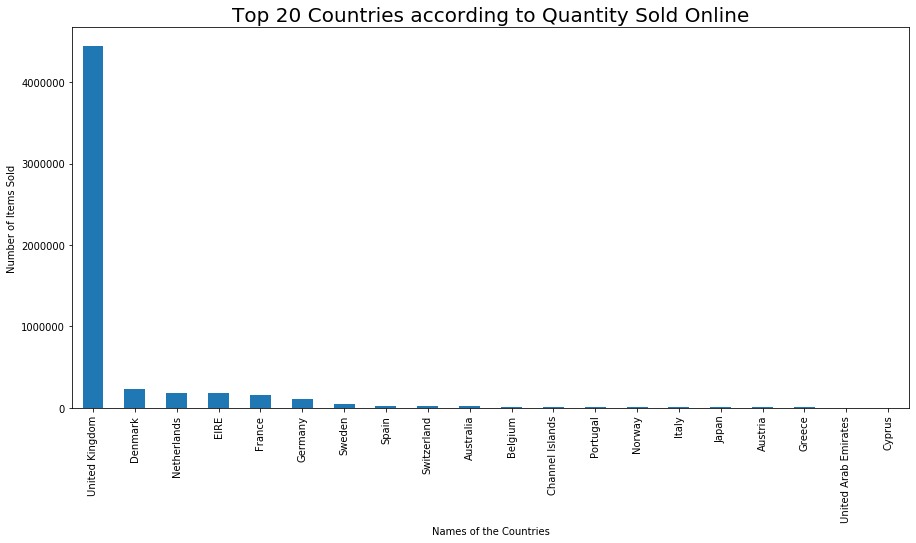

In [29]:
# Looking at the top 20 countries in terms of number according to countries

data['Quantity'].groupby(data['Country']).agg('sum').sort_values(ascending = False).head(20).plot.bar(figsize = (15, 7))

plt.title('Top 20 Countries according to Quantity Sold Online', fontsize = 20)
plt.xlabel('Names of the Countries')
plt.ylabel('Number of Items Sold')
plt.show()

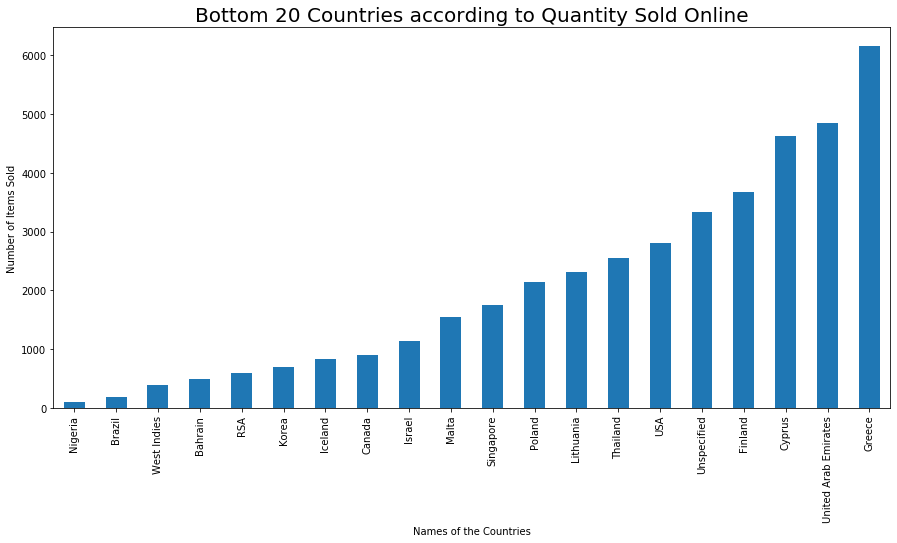

In [30]:
# Looking at the bottom 20 Countries in terms of Quantities according to the countries

data['Quantity'].groupby(data['Country']).agg('sum').sort_values(ascending = True).head(20).plot.bar(figsize = (15, 7))

plt.title('Bottom 20 Countries according to Quantity Sold Online', fontsize = 20)
plt.xlabel('Names of the Countries')
plt.ylabel('Number of Items Sold')
plt.show()

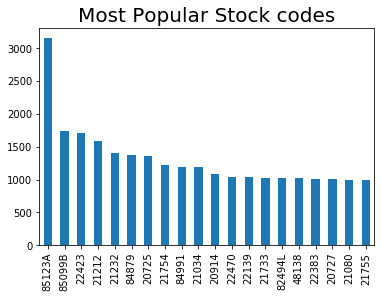

In [31]:
# looking the stockcode for the datset

data['StockCode'].value_counts().head(20).plot.bar()
plt.title('Most Popular Stock codes', fontsize = 20)
plt.show()

# Finding RFM Values

RFM consists of Recency, Frequency, Monetary initials of expressions.

In [32]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [33]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407664 entries, 0 to 525460
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407664 non-null  object        
 1   StockCode    407664 non-null  object        
 2   Description  407664 non-null  object        
 3   Quantity     407664 non-null  int64         
 4   InvoiceDate  407664 non-null  datetime64[ns]
 5   Price        407664 non-null  float64       
 6   CustomerID   407664 non-null  float64       
 7   Country      407664 non-null  object        
 8   TotalPrice   407664 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 51.1+ MB


In [34]:
#finding Recency and Monetary values.

df_x = data.groupby('CustomerID').agg({'TotalPrice': lambda x: x.sum(), #monetary value
                                        'InvoiceDate': lambda x: (today - x.max()).days}) #recency value

In [35]:
#finding the frequency value per capita

df_y = data.groupby(['CustomerID','Invoice']).agg({'TotalPrice': lambda x: x.sum()})
df_z = df_y.groupby('CustomerID').agg({'TotalPrice': lambda x: len(x)}) 

In [36]:
#creating the RFM table

rfm_table= pd.merge(df_x,df_z, on='CustomerID')

In [37]:
#determination of column names
rfm_table.rename(columns= {'InvoiceDate': 'Recency',
                          'TotalPrice_y': 'Frequency',
                          'TotalPrice_x': 'Monetary'}, inplace= True)

In [38]:
rfm_table.head()

,Monetary,Recency,Frequency
CustomerID,,,
12346.0,372.86,551,11.0
12347.0,1323.32,389,2.0
12348.0,222.16,460,1.0
12349.0,2671.14,429,3.0
12351.0,300.93,397,1.0


# Data Segmentation / Clustering

###  Visualization of Recency, Frequency and Monetary Values

In [39]:
#statistics for Recency

rfm_table.Recency.describe()

count    4312.000000
mean      477.172542
std        96.861457
min       387.000000
25%       404.000000
50%       439.000000
75%       522.000000
max       760.000000
Name: Recency, dtype: float64

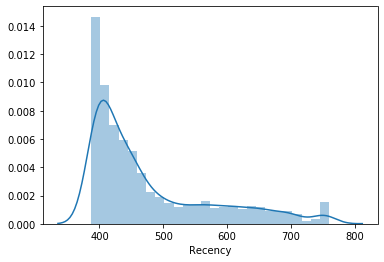

In [40]:
#Recency distribution plot

import seaborn as sns
x = rfm_table['Recency']

ax = sns.distplot(x)

In [41]:
#statistics for Frequency

rfm_table.Frequency.describe()

count    4312.000000
mean        4.455705
std         8.170213
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       205.000000
Name: Frequency, dtype: float64

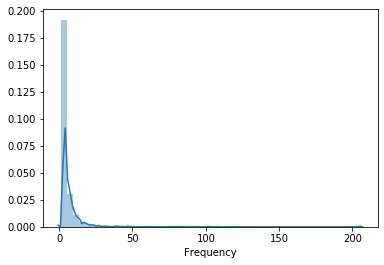

In [42]:
#Frequency distribution plot, taking observations which have frequency less than 1000

x = rfm_table.query('Frequency < 1000')['Frequency']

ax = sns.distplot(x)

In [43]:
#statistics for Monetary

rfm_table.Monetary.describe()

count      4312.000000
mean       2048.238236
std        8914.481280
min           2.950000
25%         307.987500
50%         706.020000
75%        1723.142500
max      349164.350000
Name: Monetary, dtype: float64

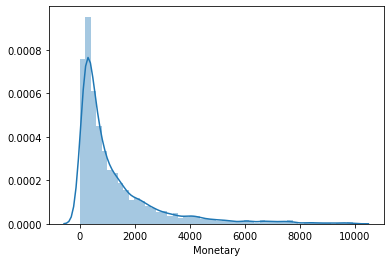

In [44]:
#Monateray distribution plot, taking observations which have monetary value less than 10000

x = rfm_table.query('Monetary < 10000')['Monetary']

ax = sns.distplot(x)

In [45]:
#Spliting into four segments using quantiles

quantiles = rfm_table.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [46]:
quantiles

{'Monetary': {0.25: 307.9875, 0.5: 706.02, 0.75: 1723.1425},
 'Recency': {0.25: 404.0, 0.5: 439.0, 0.75: 522.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0}}

In [52]:
#conversion process

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler((0,1))
x_scaled = min_max_scaler.fit_transform(rfm_table)
data_scaled = pd.DataFrame(x_scaled)

In [53]:
data[0:10]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,39.6
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,59.5
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.6
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom,45.0


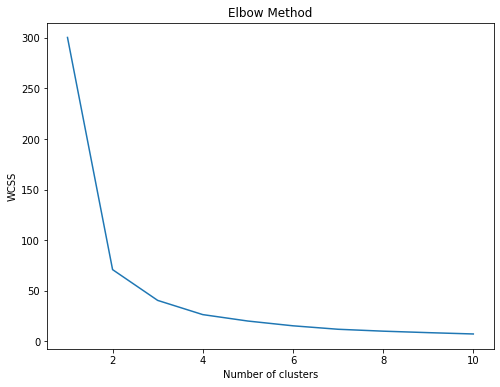

In [54]:
plt.figure(figsize=(8,6))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',n_init=10, max_iter = 300)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [55]:
#init = 'k-means ++' this makes it work faster

kmeans = KMeans(n_clusters = 4, init='k-means++', n_init =10,max_iter = 300)
kmeans.fit(data_scaled)
cluster = kmeans.predict(data_scaled)

In [56]:
#The number of people per cluster (CustomerID number)

d_frame = pd.DataFrame(rfm_table)
d_frame['cluster_no'] = cluster
d_frame['cluster_no'].value_counts() 

2    2057
0    1151
3     650
1     454
Name: cluster_no, dtype: int64

In [58]:
#cluster average values

d_frame.groupby('cluster_no').mean() 

,Monetary,Recency,Frequency
cluster_no,,,
0,1233.741964,464.344049,3.105995
1,529.113222,693.017621,1.343612
2,3257.084273,405.775401,6.654837
3,726.040802,575.073846,2.060000


In [59]:
#RFM Table

rfm_table.head()

,Monetary,Recency,Frequency,cluster_no
CustomerID,,,,
12346.0,372.86,551,11.0,3
12347.0,1323.32,389,2.0,2
12348.0,222.16,460,1.0,0
12349.0,2671.14,429,3.0,2
12351.0,300.93,397,1.0,2
